<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def convolution2d(kernel):

  img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena.jpg')
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

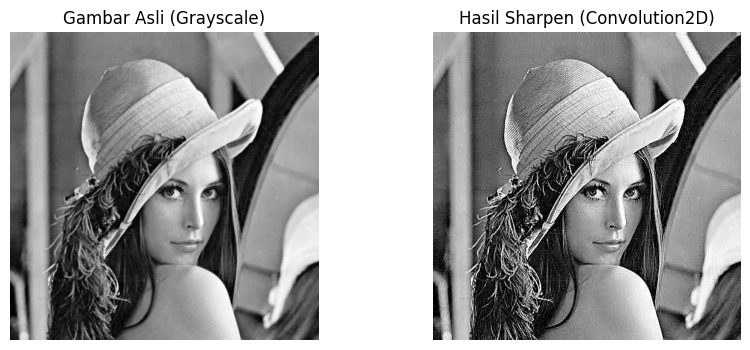

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

img = cv.imread("/content/drive/MyDrive/Tugas PCVK/lena.jpg")
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

output = convolve2d(img_gray, kernel_sharpen, mode='same', boundary='symm')

output = np.clip(output, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Gambar Asli (Grayscale)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title("Hasil Sharpen (Convolution2D)")
plt.axis("off")

plt.show()


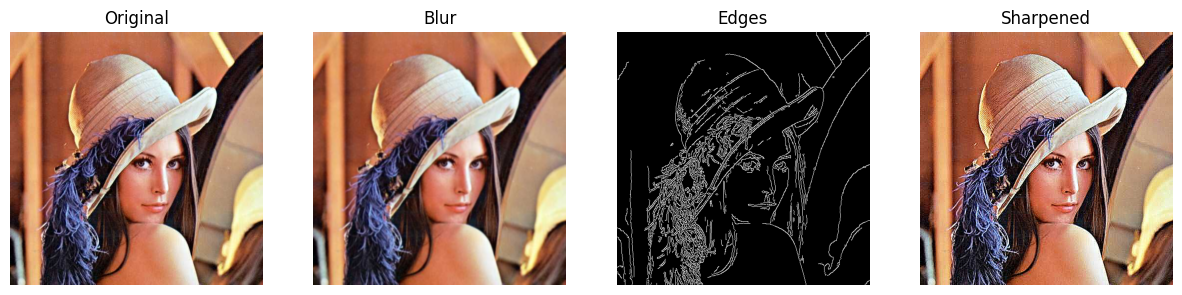

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if len(image.shape) == 2:
            plt.imshow(image, cmap="gray")
        else:
            plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena.jpg')
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan di path yang diberikan!")

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7, 7), 1)
edges = cv.Canny(img_gray, 100, 200)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)

show_side_by_side([img, blur, edges, sharpened],
                  ["Original", "Blur", "Edges", "Sharpened"])


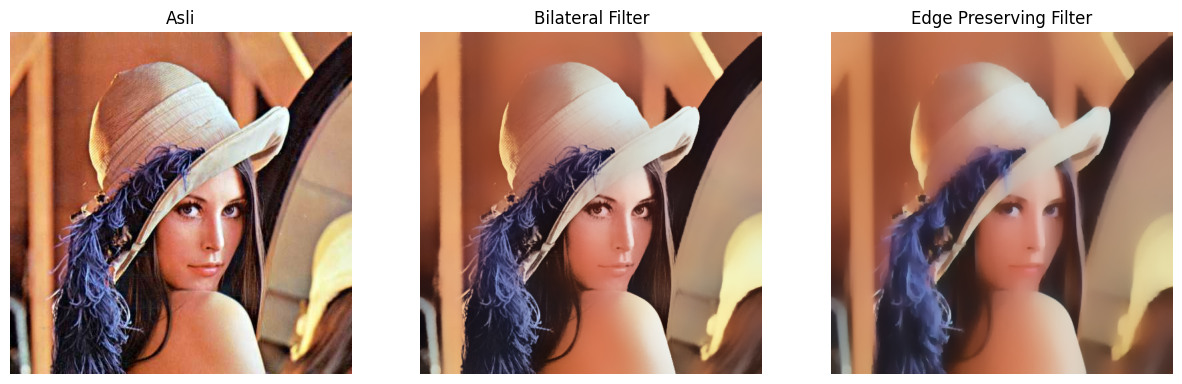

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt

def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

img_path = "/content/drive/MyDrive/Tugas PCVK/lena.jpg"
img = cv.imread(img_path)

if img is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan di path: {img_path}")

bilateral = cv.bilateralFilter(img, 50, 100, 100)

edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])


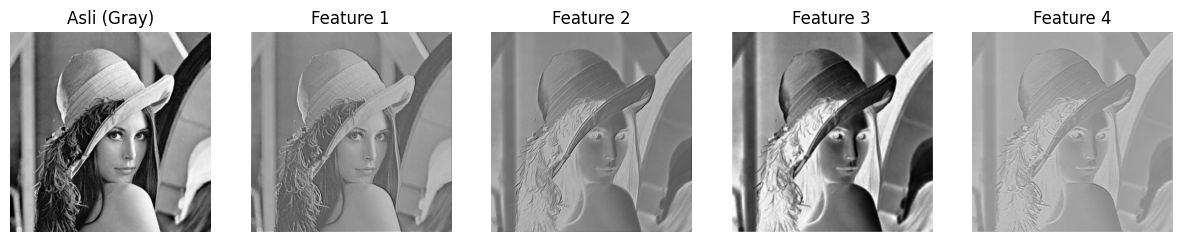

In [19]:
import cv2 as cv
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

img_path = "/content/drive/MyDrive/Tugas PCVK/lena.jpg"
img = cv.imread(img_path)

if img is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan di path: {img_path}")

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

with torch.no_grad():
    features = model(img_tensor)

feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]

show_side_by_side(
    [img_gray] + feature_maps,
    ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))]
)

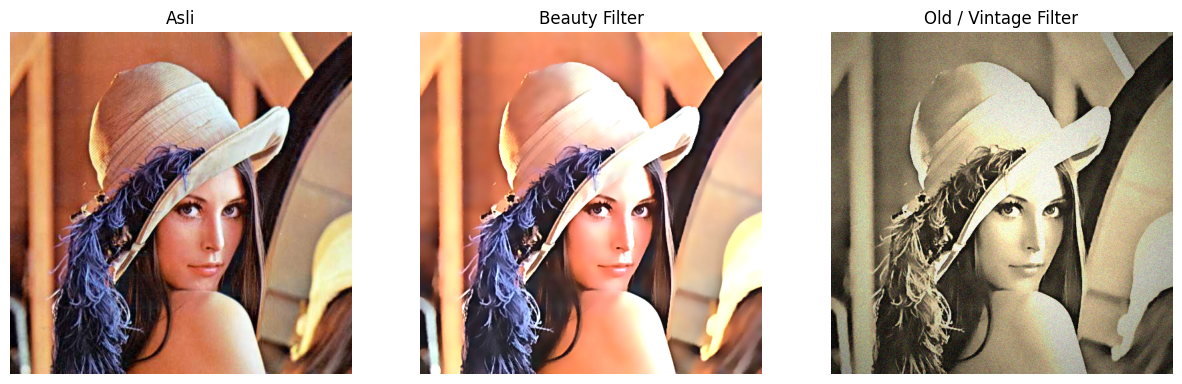

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("/content/drive/MyDrive/Tugas PCVK/lena.jpg")
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")

smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

gaussian = cv.GaussianBlur(smooth, (0, 0), 3)

sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

alpha = 1.2
beta = 15
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

sepia_kernel = np.array([
    [0.272, 0.534, 0.131],
    [0.349, 0.686, 0.168],
    [0.393, 0.769, 0.189]
])
sepia = cv.transform(beauty, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols * 0.6)
kernel_y = cv.getGaussianKernel(rows, rows * 0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:, :, i] = vignette[:, :, i] * mask

noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 5))
titles = ["Asli", "Beauty Filter", "Old / Vintage Filter"]
images = [img, beauty, old_img]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.show()

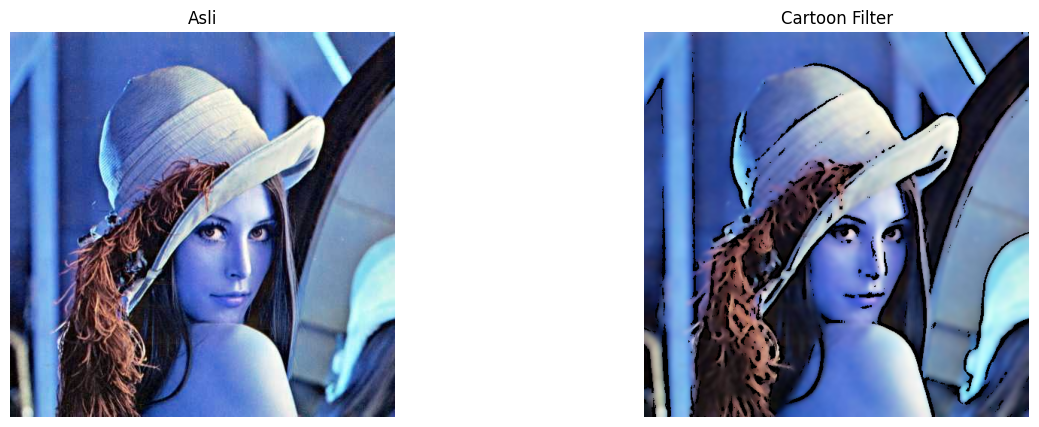

In [23]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9,9)

color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

cartoon = cv.bitwise_and(color,color, mask=edges)

show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

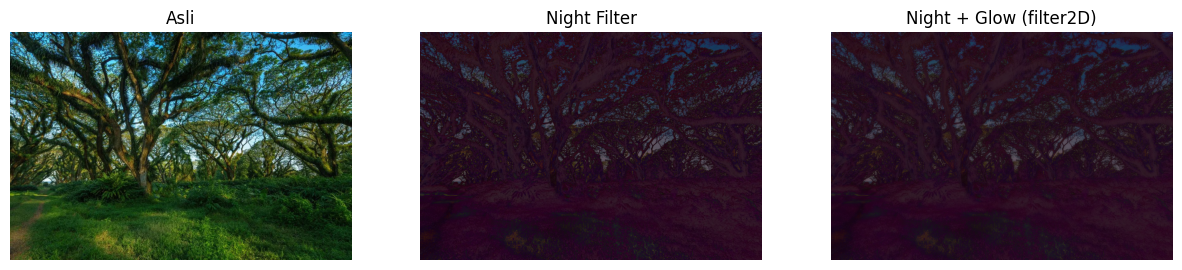

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/Tugas PCVK/djawatan.jpg")
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

blue_tint = np.full_like(night, (50, 0, 100))
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

kernel = np.ones((15, 15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side(
    [img, night, night_glow],
    ["Asli", "Night Filter", "Night + Glow (filter2D)"]
)


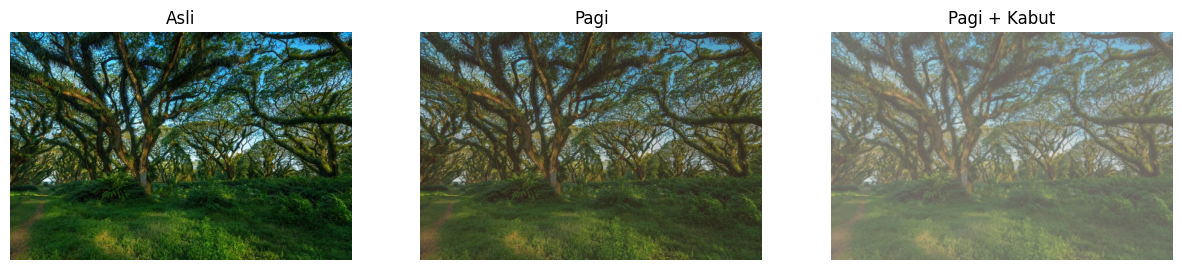

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/Tugas PCVK/djawatan.jpg")
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan!")

alpha = 0.9
beta = 20
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

warm_tint = np.full_like(soft, (40, 70, 120))
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T
kabut = cv.filter2D(pagi, -1, kernel)

white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side(
    [img, pagi, kabut],
    ["Asli", "Pagi", "Pagi + Kabut"]
)
